In [7]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio import imread, imsave
from numpy.random import randint

# Problem 1

Complete the following function, by implementing the anisotropic difusion algorithm found in 10.1 for black and white images.
Run the function on balloon.jpg. Show the original image and the difused image for σ = .1,
λ = .25, N = 5, 20, 100.

In [8]:
def anisdiff_bw(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    #pad
    U = np.pad(U, 1, mode='edge')
    #complete iterations
    for n in range(N):
        #update
        U_new = U + lambda_ * ( g( np.abs( np.roll( U, -1, axis=1 ) - U ) ) * ( np.roll( U, -1, axis = 1 ) - U )
                                +g( np.abs( np.roll( U, -1, axis=0 ) - U ) ) * ( np.roll( U, -1, axis = 0 ) - U ) 
                                +g( np.abs( np.roll( U, 1, axis=1 ) - U ) ) * ( np.roll( U, 1, axis = 1 ) - U )
                                +g( np.abs( np.roll( U, 1, axis=0 ) - U ) ) * ( np.roll( U, 1, axis = 0 ) - U ) )
        #reset
        U = U_new

    return U

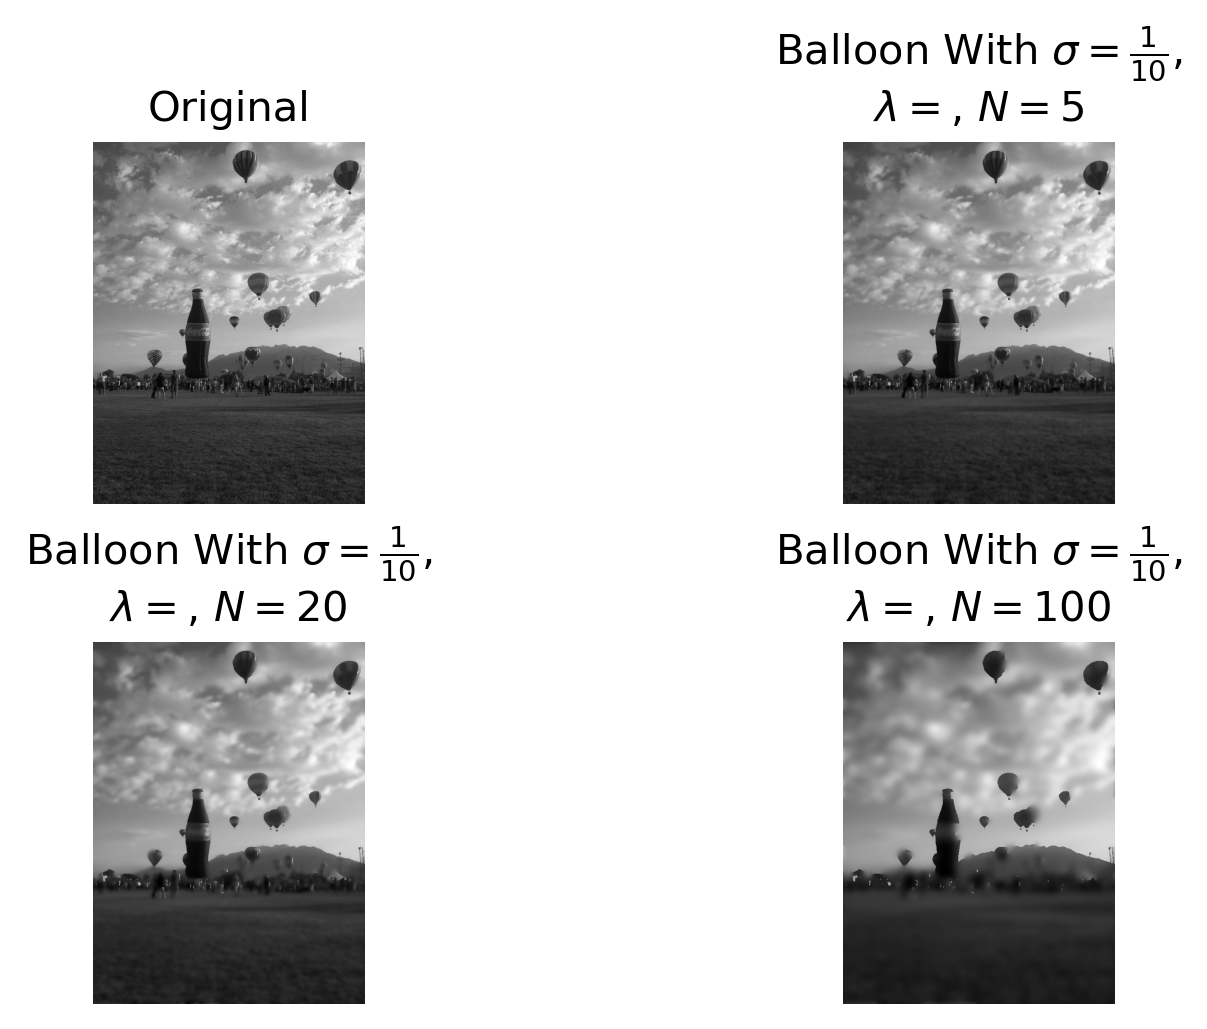

In [9]:
def problem1():

    #read in baloon and set up figure
    balloon = imread('balloon.jpg', as_gray=True)/255
    fig, axs = plt.subplots(2, 2, constrained_layout=True)
    fig.set_dpi(250)

    #plot original
    ax = axs[0, 0]
    ax.set_title('Original')
    ax.imshow(balloon, cmap='gray')
    ax.axis('off')

    N_vals = [5, 20, 100]
    sigma = 1/10.
    lambda_ =1/4.
    g = lambda x: np.exp( -( x / sigma )**2 )
    #now get every other diffused image and plot
    count = 0
    for i in range(2):
        for j in range(2):
            if (i==0) and (j == 0):
                continue
            else:
                curr_balloon = anisdiff_bw(balloon, N_vals[count], lambda_, g)
                ax = axs[i, j]
                ax.imshow(curr_balloon, cmap='gray')
                ax.set_title(r'Balloon With $\sigma = \frac{1}{10}$,' +'\n$\lambda = \frac{1}{4}$, $N = $' + str(N_vals[count]))
                ax.axis('off')
                count += 1

    plt.show()
    return
problem1()

# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the difused image for
σ = .1, λ = .25, N = 5, 20, 100.

In [10]:
def anisdiff_color(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    #norm function
    norm = lambda x: np.sqrt(np.sum(x**2, axis=2, keepdims=True))
    #pad to ignore 3rd dimension
    U = np.pad(U, pad_width=1)[:, :, 1:-1]
    #complete iterations
    for n in range(N):
        #use np.roll to get new iterations 
        U_new = U + lambda_ * ( g( norm( np.roll( U, -1, axis=1 ) - U ) ) * ( np.roll( U, -1, axis = 1 ) - U )
                                +g( norm( np.roll( U, -1, axis=0 ) - U ) ) * ( np.roll( U, -1, axis = 0 ) - U ) 
                                +g( norm( np.roll( U, 1, axis=1 ) - U ) ) * ( np.roll( U, 1, axis = 1 ) - U )
                                +g( norm( np.roll( U, 1, axis=0 ) - U ) ) * ( np.roll( U, 1, axis = 0 ) - U ) )
        #update
        U = U_new

    return U

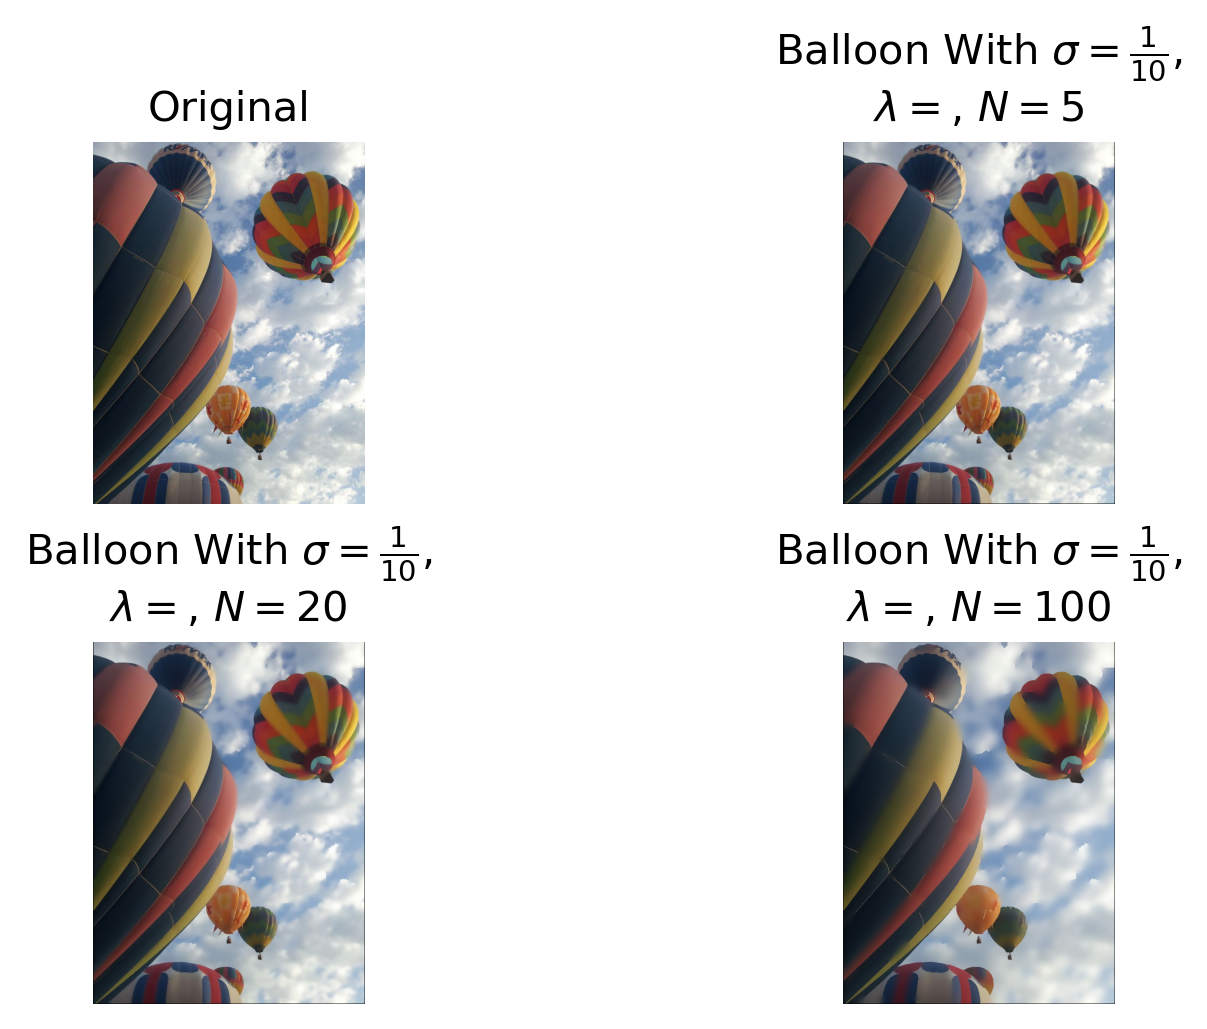

In [13]:
def problem2():
    balloon = imread('balloons_color.jpg')/255
    fig, axs = plt.subplots(2, 2, constrained_layout=True)
    fig.set_dpi(250)
    ax = axs[0, 0]
    ax.set_title('Original')
    ax.imshow(balloon, cmap='gray')
    ax.axis('off')

    N_vals = [5, 20, 100]
    sigma = 1/10.
    lambda_ =1/4.
    g = lambda x: np.exp( -( x / sigma )**2 )
    count = 0
    for i in range(2):
        for j in range(2):
            if (j == 0) and (i == 0):
                continue
            else:
                curr_balloon = anisdiff_color(balloon, N_vals[count], lambda_, g)
                ax = axs[i, j]
                ax.imshow(curr_balloon)
                ax.set_title(r'Balloon With $\sigma = \frac{1}{10}$,' + '\n$\lambda = \frac{1}{4}$, $N = $' + str(N_vals[count]))
                ax.axis('off')
                count += 1

    plt.show()

    return
problem2()

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic difusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

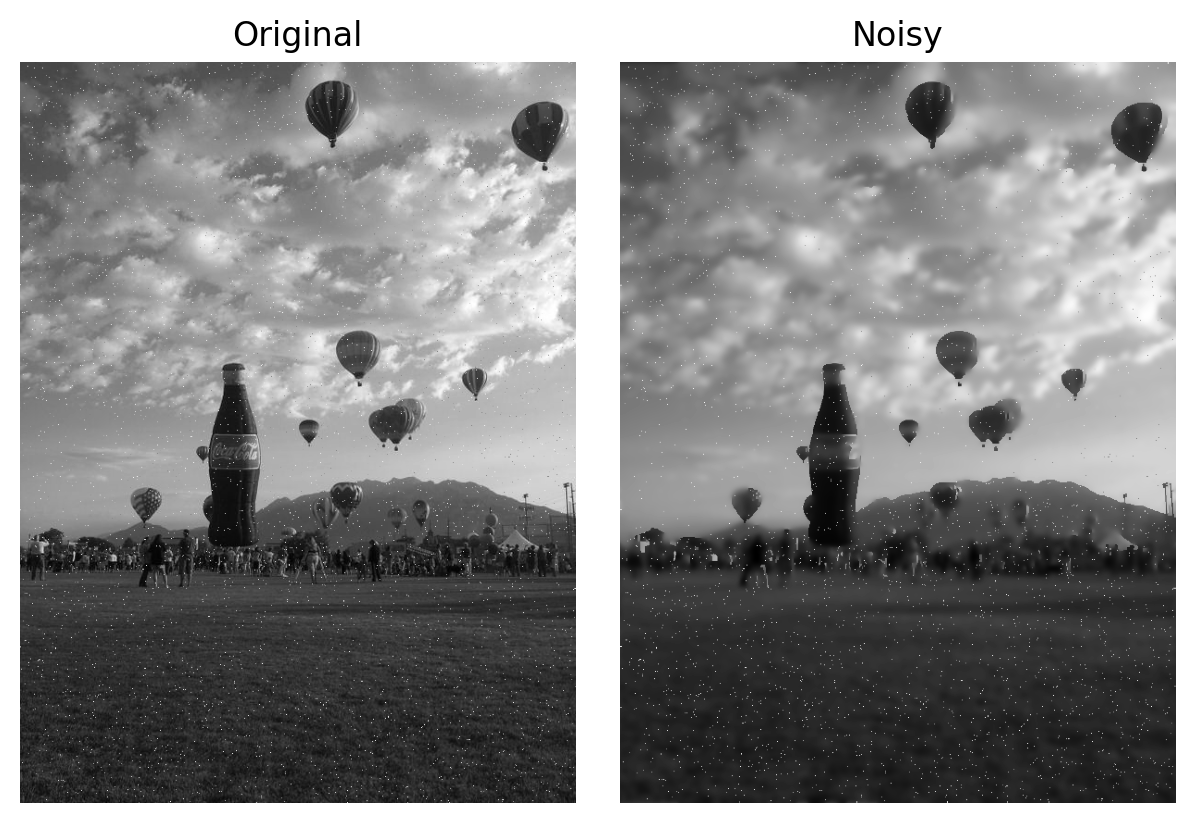

In [14]:
def problem3():
    #read in image
    image = imread('balloon.jpg', as_gray=True)
    #modify image by adding noise
    x, y = image.shape
    for i in range(x*y//100):
        image[randint(x),randint(y)] = 127 + randint(127)


    modified = image.copy()
    #rescale
    modified /= 255
    image /= 255
    #now we plot the original
    fig, axs = plt.subplots(1, 2, constrained_layout=True)
    fig.set_dpi(200)
    ax = axs[0]
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title('Original')
    #run anisdiff on noisy image
    N = 20
    sigma = 1/10.
    lambda_ =1/4.
    g = lambda x: np.exp( -( x / sigma )**2 )
    noise = anisdiff_bw(modified, N, lambda_, g)

    #plot image
    ax = axs[-1]
    ax.imshow(noise, cmap='gray')
    ax.axis('off')
    ax.set_title('Noisy')
    plt.show()

    return

problem3()

The type of blurring that we are doing doesn't work on these tiny grains for the same reason it doesn't blur edges- it is not designed to specifically take out the different parts of an image.

# Problem 4 (Optional)

Implement the minimum-biased finite diverence scheme described above. Add noise to
balloons_color.jpg using the provided code below, and clean it using your implementation.
Show the original image, the noised image, and the cleaned image.

In [24]:
image = imread('balloons_color.jpg')
x,y,z = image.shape
for dim in range(z):
    for i in range(x*y//100):
        # Assign a random value to a random place
        image[randint(x),randint(y),dim] = 127 + randint(127)
